<a href="https://colab.research.google.com/github/ayseulusoy/AGE-AND-GENDER-PREDICTION-WITH-DEEP-LEARNING/blob/main/AGE_AND_GENDER_PREDICTION_WITH_DEEP_LEARNING_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import  tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from IPython.display import Image
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [ ]:
zip_adres="/content/drive/MyDrive/UTKFace.zip"
!cp "{zip_adres}" .

In [ ]:
!unzip -q UTKFace.zip
!rm UTKFace.zip

In [ ]:
adres="UTKFace"

In [ ]:
images = []
ages = []
genders = []
for file in tqdm(os.listdir(adres)):
    image_adres = os.path.join(adres,file)
    image = cv2.imread(image_adres,0)
    if(image is not None):
      image = cv2.resize(image,dsize=(64,64))
      image = image.reshape((image.shape[0],image.shape[1],1))
      images.append(image)
      split_var = file.split('_')
      ages.append(split_var[0])
      genders.append(split_var[1] )

100%|██████████| 23708/23708 [00:06<00:00, 3909.50it/s]


In [ ]:
len(genders)

23708

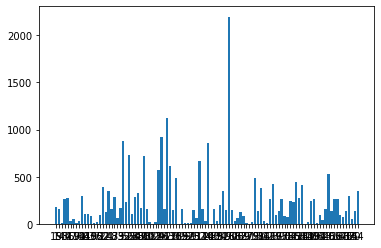

Max age: 99


In [ ]:
x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]
plt.bar(x_ages,y_ages)
plt.show()
print("Max age:",max(ages))

In [ ]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,"[[[104], [102], [97], [96], [93], [94], [94], ...",24,1
1,"[[[83], [89], [106], [134], [167], [186], [192...",30,0
2,"[[[50], [61], [68], [77], [102], [136], [159],...",27,1
3,"[[[217], [219], [201], [140], [28], [21], [30]...",30,0
4,"[[[224], [128], [35], [25], [21], [18], [18], ...",26,1
...,...,...,...
23703,"[[[80], [66], [51], [54], [68], [92], [85], [9...",72,1
23704,"[[[0], [0], [0], [214], [217], [217], [218], [...",24,0
23705,"[[[23], [21], [19], [31], [58], [79], [77], [8...",26,0
23706,"[[[190], [193], [174], [157], [123], [107], [1...",31,1


Gender: 0 Age: 59


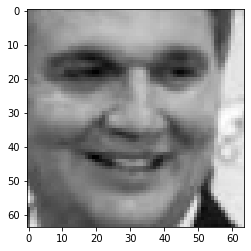

In [ ]:
def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
idx = 500
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [ ]:
def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 50:
        return 3
    elif age<80:
        return 4
    else:
      return 5

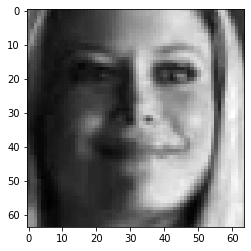

In [ ]:
size=len(os.listdir(adres))
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 5
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(features[550])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])
print("Shape of image:",sample.shape)

Samples in Training: 18966
Samples in Testing: 4742
Shape of image: (64, 64, 1)


In [ ]:
inputs = Input(shape=(64,64,1))
zero1=ZeroPadding2D((1,1))(inputs)
conv1 = Conv2D(32, kernel_size=(3, 3),activation='swish')(zero1)
zero2=ZeroPadding2D((1,1))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='swish')(zero2)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='swish')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 =  Conv2D(256, kernel_size=(3, 3),activation='swish')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv4)
x = Dropout(0.25)(pool3)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(256, activation='swish')(flat)
age_model = dropout(age_model)
age_model = Dense(128, activation='swish')(age_model)
age_model = dropout(age_model)
age_model = Dense(64, activation='swish')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='swish')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='swish')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(256, activation='swish')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(128, activation='swish')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='swish')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='swish')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='swish')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='swish')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [ ]:
model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 66, 66, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 32)   320         zero_padding2d[0][0]             
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 66, 66, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 50, batch_size=128,shuffle = True)

Epoch 1/50
149/149 [==============================] - 58s 88ms/step - loss: 0.8575 - dense_4_loss: 0.1651 - dense_11_loss: 0.6925 - dense_4_accuracy: 0.0070 - dense_11_accuracy: 0.5175 - val_loss: 0.6668 - val_dense_4_loss: 0.0449 - val_dense_11_loss: 0.6219 - val_dense_4_accuracy: 0.0276 - val_dense_11_accuracy: 0.6767
Epoch 2/50
149/149 [==============================] - 12s 80ms/step - loss: 0.6442 - dense_4_loss: 0.0627 - dense_11_loss: 0.5816 - dense_4_accuracy: 0.0155 - dense_11_accuracy: 0.7159 - val_loss: 0.3838 - val_dense_4_loss: 0.0347 - val_dense_11_loss: 0.3491 - val_dense_4_accuracy: 0.0297 - val_dense_11_accuracy: 0.8547
Epoch 3/50
149/149 [==============================] - 12s 80ms/step - loss: 0.4475 - dense_4_loss: 0.0443 - dense_11_loss: 0.4032 - dense_4_accuracy: 0.0206 - dense_11_accuracy: 0.8523 - val_loss: 0.3613 - val_dense_4_loss: 0.0287 - val_dense_11_loss: 0.3326 - val_dense_4_accuracy: 0.0266 - val_dense_11_accuracy: 0.8454
Epoch 4/50
149/149 [==============

In [ ]:
model.save('data.h5')

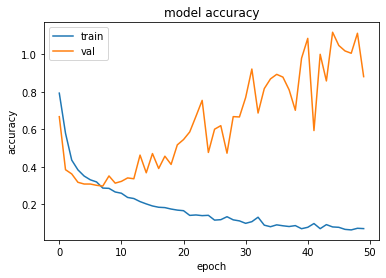

In [ ]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def get_age(distr):
    distr = distr*5
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-50"
    if distr >= 3.65 and distr <= 4.4:return "51-80"
    if distr >= 4.64 and distr <= 5.4:return "80 +"
    return "Unknown"
    
def get_gender(prob):
    if genders[idx]=='0':
      return "Male"
    elif genders[idx]=='1':
      return "Female"
    
def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)

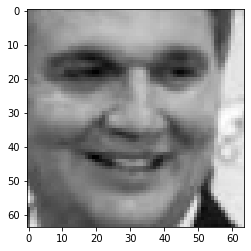

Actual Gender: Male Age: 59
Values: [array([[0.7114292]], dtype=float32), array([[3.4555346e-33]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


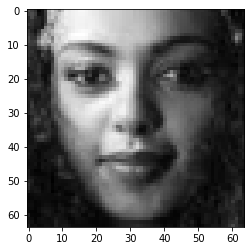

Actual Gender: Female Age: 26
Values: [array([[0.43270865]], dtype=float32), array([[0.999796]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


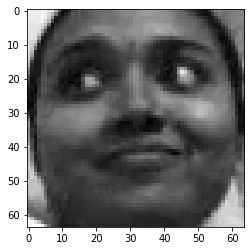

Actual Gender: Male Age: 26
Values: [array([[0.46810964]], dtype=float32), array([[0.4177796]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


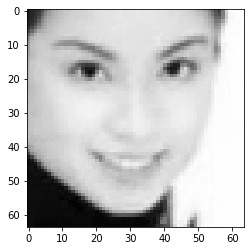

Actual Gender: Female Age: 27
Values: [array([[0.4171067]], dtype=float32), array([[0.9988569]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


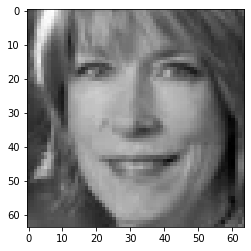

Actual Gender: Female Age: 40
Values: [array([[0.57911414]], dtype=float32), array([[0.9999901]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 31-50


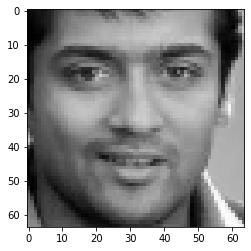

Actual Gender: Male Age: 27
Values: [array([[0.41298118]], dtype=float32), array([[2.802702e-27]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


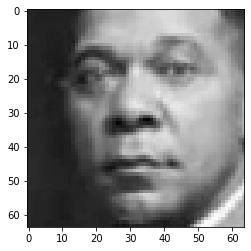

Actual Gender: Male Age: 62
Values: [array([[0.72939104]], dtype=float32), array([[1.4576939e-19]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


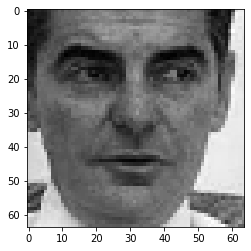

Actual Gender: Male Age: 48
Values: [array([[0.6476576]], dtype=float32), array([[3.1980024e-20]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-50


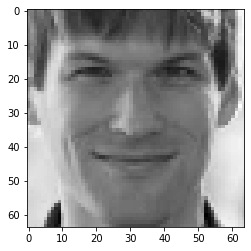

Actual Gender: Male Age: 29
Values: [array([[0.47622174]], dtype=float32), array([[2.6048487e-15]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


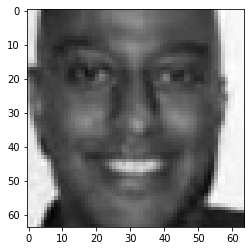

Actual Gender: Male Age: 36
Values: [array([[0.4884844]], dtype=float32), array([[2.581655e-12]], dtype=float32)] 
Predicted Gender: Male Predicted Age: Unknown


In [ ]:
indexes = [500,59,80,2,4546,7,9,256,45,65]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)